<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/BonusLectures/Function_Writing_Mini_Lesson_Evaluating_Classification_Models_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Writing Mini-Lesson - Evaluating Classification Models


- Cohort: 10.11 Cohort
- Date: 12/09/21
- Author: James Irving



## Learning Objectives

- For today's quick task (15-min), we have already completed the preprocessing and initial modeling evaluation code. 

>- First goal:
    - repackage the code from the first model into an `evaluate_classification` function
- Second goal: 
    - Add more flexibility to the function.
- Post-Lecture Level-Up/Bonus Goal:
    - Create a `fit_and_evaluate` function that uses the `evaluate_classification` function.

# 🚢 Predicting Passenger Survival on the Titanic with `scikit-learn`

In [ ]:
## All imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.


In [ ]:
## Load in dataset from url 
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS7TaxsUixSyoL0Rn8LPfbWIjeTd2-QdoZ0B2Knk14XYEmUzHUL-UhMilWK34Fn9dGjTcuo0-teSLU2/pub?output=csv"
df = pd.read_csv(url,index_col=0,na_values='?')

## Keep relevant columns
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
PassengerId,,,,,,,
1,3,22.0,1,7.2500,male,S,0
2,1,38.0,1,71.2833,female,C,1
3,3,26.0,0,7.9250,female,S,1
4,1,35.0,1,53.1000,female,S,1
5,3,35.0,0,8.0500,male,S,0
...,...,...,...,...,...,...,...
887,2,27.0,0,13.0000,male,S,0
888,1,19.0,0,30.0000,female,S,1
889,3,NaN,1,23.4500,female,S,0


## Exploratory Analysis

In [ ]:
## Check out the .info for dtypes + summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [ ]:
## check null values 
df.isna().sum()

Pclass        0
Age         177
SibSp         0
Fare          0
Sex           0
Embarked      2
Survived      0
dtype: int64

In [ ]:
## check for duplicates
df.duplicated().sum()

112

In [ ]:
## drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
## check range of numeric values
df.describe().round(2)

,Pclass,Age,SibSp,Fare,Survived
count,779.00,676.00,779.00,779.00,779.00
mean,2.25,29.81,0.53,34.86,0.41
std,0.85,14.73,0.99,52.29,0.49
min,1.00,0.42,0.00,0.00,0.00
25%,1.00,20.00,0.00,8.05,0.00
50%,3.00,28.00,0.00,16.00,0.00
75%,3.00,39.00,1.00,34.38,1.00
max,3.00,80.00,8.00,512.33,1.00


## Preprocessing

In [ ]:
## Separate X and y and train-test-split
target = 'Survived'

y = df[target]
X = df.drop(target, axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y,random_state=42)
y_train.value_counts()

0    346
1    238
Name: Survived, dtype: int64

In [ ]:
## save class labels
target_labels = ['Died','Survived']

In [ ]:
## Check for nulls in training set
X_train.isna().sum()

Pclass       0
Age         74
SibSp        0
Fare         0
Sex          0
Embarked     1
dtype: int64

In [ ]:
## make categorical preprocessing pipe
cat_sel = make_column_selector(dtype_include=['object'])
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include=['number'])

## cat pipe
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',sparse=False))
## cat pipe
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                         StandardScaler())

## Make column transformer
preprocessor = make_column_transformer( (num_pipe,num_sel),
                                       (cat_pipe,cat_sel))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6260255710>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <s

## Fitting a Logistic Regression with `scikit-learn`

In [ ]:
# Modeling pipeline
pipe = make_pipeline(preprocessor,LogisticRegression())
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6260255710>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                 

# 🕹 Start of In-Class Activity 

>- Q: Now that we've fit our model, what things do we want to check to evaluate how good it is?

- Answers:
    - Model Scores: 
        - Accuracy, Precision, Recall, F1-Score
    - Confusion Matrix
    - ??
    
>- Now let's write the code to do so!

In [ ]:
## Get Predictions for training and test data to check metrics functions
y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

In [ ]:
## Print classification report for the test data (and make it pretty!)
print('---'*20)
print(f"[i] CLASSIFICATION REPORT FOR TEST DATA")
print('---'*20)
print(classification_report(y_test,y_hat_test,target_names=target_labels))

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.84      0.86      0.85       111
    Survived       0.80      0.79      0.80        84

    accuracy                           0.83       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.83      0.83      0.83       195



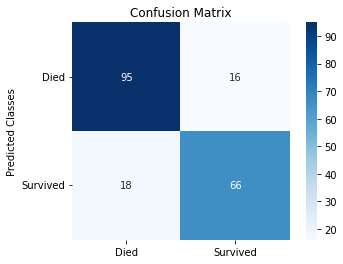

In [ ]:
## Calculate a confusion matrix with sklearn
cm =confusion_matrix(y_test,y_hat_test)

## Plot the confusion Matrix using seaborn
ax = sns.heatmap(cm, annot=True,square=True,cmap="Blues")

## Label classes
ax.set_xticklabels(target_labels)
ax.set_yticklabels(target_labels,rotation=0)

## Add axis labels & title
ax.set_ylabel('True Classes')
ax.set_ylabel('Predicted Classes')
ax.set_title('Confusion Matrix');

> - Personal Preference: 
    - I always normalize my confusion matrix to the true class using `normalize='true'`.
    

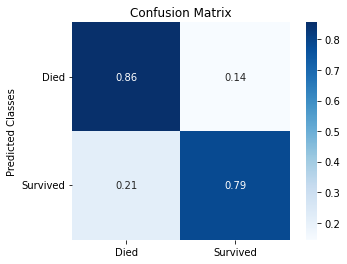

In [ ]:
## Calculate a confusion matrix with sklearn
cm = confusion_matrix(y_test,y_hat_test,normalize='true')

## Plot the confusion Matrix using seaborn
ax = sns.heatmap(cm, annot=True,square=True,cmap="Blues")

## Label classes
ax.set_xticklabels(target_labels)
ax.set_yticklabels(target_labels,rotation=0)

## Add axis labels & title
ax.set_ylabel('True Classes')
ax.set_ylabel('Predicted Classes')
ax.set_title('Confusion Matrix');

### Evaluate the DummyClassifier model to compare against our LogisticRegression

> - We need to produce the same exact display as our other model to have the best comparison. 
> Copying and pasting this code is inefficient and error-prone.
- It would be much better to make a function to evaluate our models that we can use over and over again to get the exam same output.
- Personal Rule of Thumb🇰
    - Any repeated code that is 4 lines or longer should be packaged into a function isntead of repeated.


In [ ]:
from sklearn.dummy import DummyClassifier

## Make and fit  dummy classifier
dummy_pipe = make_pipeline(preprocessor,DummyClassifier(strategy='stratified'))
dummy_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6260255710>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                 

## ✍ Writing our `evaluate_classification` function

- Write a function called `evaluate_classification`
- It should accept (at minimum): 
    - model (sklearn model)
    - X_test
    - y_test

- It should: 
    - Display the classification report
    - Display the confusion matrix
    
>- ***Ideally you would also accept X_train and y_train to compare results to check for overfitting, but we will save that for a Level-Up task.***


In [ ]:
import sklearn.metrics as metrics
## Solution ansewr

def evaluate_classification(model,X_test,y_test, label='Test Data'): 
    ## Get Predictions
    y_hat_test = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(metrics.classification_report(y_test, y_hat_test,
                                        target_names=target_labels))

    ## Calculate a confusion matrix with sklearn
    cm = metrics.confusion_matrix(y_test,y_hat_test,normalize='true')

    ## Plot the confusion Matrix using seaborn
    ax = sns.heatmap(cm, annot=True,square=True,cmap="Blues")

    ## Label classes
    ax.set_xticklabels(target_labels)
    ax.set_yticklabels(target_labels,rotation=0)

    ## Add axis labels & title
    ax.set_ylabel('True Classes')
    ax.set_ylabel('Predicted Classes')
    ax.set_title('Confusion Matrix');
        

### Test our function using the DummyClassifier

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.48      0.50      0.49       111
    Survived       0.30      0.29      0.29        84

    accuracy                           0.41       195
   macro avg       0.39      0.39      0.39       195
weighted avg       0.40      0.41      0.40       195



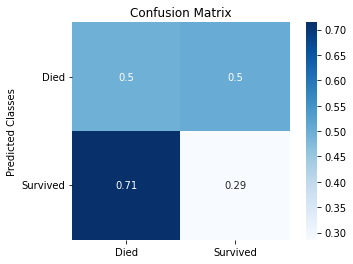

In [ ]:
## evaluate the dummy model with our function
evaluate_classification(dummy_pipe, X_test,y_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.84      0.86      0.85       111
    Survived       0.80      0.79      0.80        84

    accuracy                           0.83       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.83      0.83      0.83       195



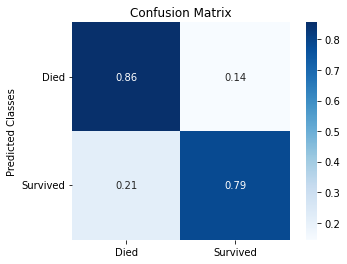

In [ ]:
## evaluate our logreg model with our function
evaluate_classification(pipe, X_test,y_test)

> Fantastic! We repackaged our code into a re-usable form!

### ✍ Making our function flexible

>- Now that we have a Minimal Viable Product version of our function, let's make it more flexible. Let's make a new version where:
1. normalizing the confusion matrix optional.
2. We can change the text printed at the top for clarity. 
3. Add the option to show class labels for classification_report and our confusion matrix.

In [ ]:
import sklearn.metrics as metrics
## Solution answer

def evaluate_classification(model,X,y_true, classes=None, normalize='true',
                            cmap="Blues",  label="Test Data"): 

    ## Get Predictions
    y_pred = model.predict(X)
    
    ## Classification Report / Scores 
    dashes = '---'*20
    print(dashes)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print(dashes)
    
    print(metrics.classification_report(y_true,y_pred,
                                        target_names=classes))
    # print(dashes)
    

    ## Plot a confusion matrix
    cm = metrics.confusion_matrix(y_true,y_pred,normalize=normalize,)
    # plt.figure(figsize=figsize)
    ax = sns.heatmap(cm, annot=True,square=True,cmap=cmap)

    if classes != None:
        ## Label classes
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes,rotation=0)

    ## Add axis labels & title
    ax.set_ylabel('True Classes')
    ax.set_xlabel('Predicted Classes')
    ax.set_title('Confusion Matrix');
    plt.show()
    
    
    

### Try an additional model type and evaluate with our function

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.79      0.86      0.82       111
    Survived       0.79      0.70      0.74        84

    accuracy                           0.79       195
   macro avg       0.79      0.78      0.78       195
weighted avg       0.79      0.79      0.79       195



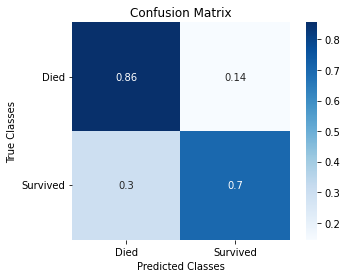

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.85      0.88      0.87       346
    Survived       0.82      0.77      0.79       238

    accuracy                           0.84       584
   macro avg       0.83      0.83      0.83       584
weighted avg       0.84      0.84      0.84       584



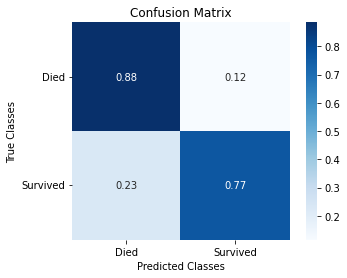

In [ ]:
## Make and fit  dummy classifier
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
knn_pipe.fit(X_train,y_train)
evaluate_classification(knn_pipe,X_test,y_test,classes=target_labels)
evaluate_classification(knn_pipe,X_train,y_train,classes=target_labels,
                        label='Training Data')

### Now fit one more model type  (your choice)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.83      0.82      0.82       111
    Survived       0.76      0.77      0.77        84

    accuracy                           0.80       195
   macro avg       0.80      0.80      0.80       195
weighted avg       0.80      0.80      0.80       195



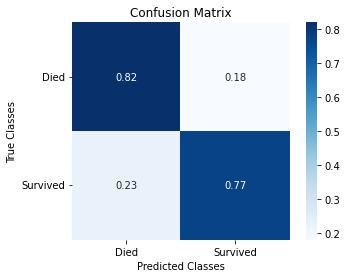

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.99      0.99      0.99       346
    Survived       0.98      0.98      0.98       238

    accuracy                           0.98       584
   macro avg       0.98      0.98      0.98       584
weighted avg       0.98      0.98      0.98       584



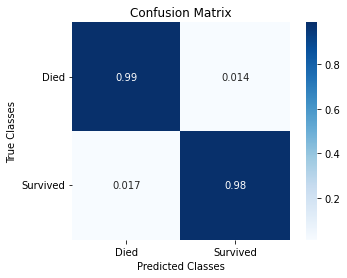

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = make_pipeline(preprocessor,RandomForestClassifier())
rf_pipe.fit( X_train, y_train)
evaluate_classification(rf_pipe,X_test,y_test,classes=target_labels)
evaluate_classification(rf_pipe,X_train,y_train,classes=target_labels,label="Training Data")

## 🌠 Post-Lecture Level-Up: Writing a function to fit and evaluate BOTH the training and test data

- Now write a function that will take in a model, training and test data. 

- The function should fit the model and then evaluate the model:
    - For the test data
    - and for the training data

In [ ]:
def fit_and_evaluate_model(model,X_train,y_train, X_test,y_test, classes=None,
                           normalize='true', figsize=(10,5), label="Test Data"):
    
    model.fit( X_train, y_train)
    evaluate_classification(rf_pipe,X_test,y_test,classes=target_labels,
                            label='Test Data',cmap='Greens')
    evaluate_classification(rf_pipe,X_train,y_train,classes=target_labels,
                            label="Training Data",cmap='Blues')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.81      0.85      0.83       111
    Survived       0.78      0.74      0.76        84

    accuracy                           0.80       195
   macro avg       0.80      0.79      0.79       195
weighted avg       0.80      0.80      0.80       195



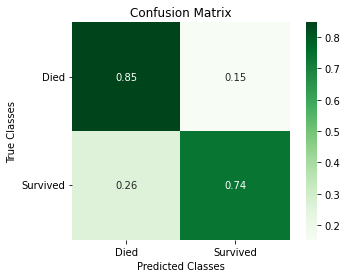

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.98      0.99      0.99       346
    Survived       0.99      0.97      0.98       238

    accuracy                           0.98       584
   macro avg       0.99      0.98      0.98       584
weighted avg       0.98      0.98      0.98       584



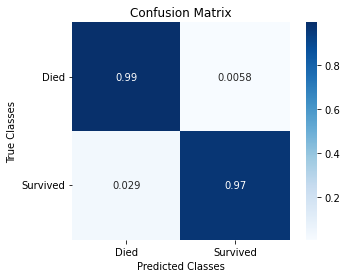

In [ ]:
## Now use your fit_and_evaluate_model function below!
fit_and_evaluate_model(rf_pipe,X_train,y_train,X_test,y_test)